EXTRACTING DATA FROM THE DATASET

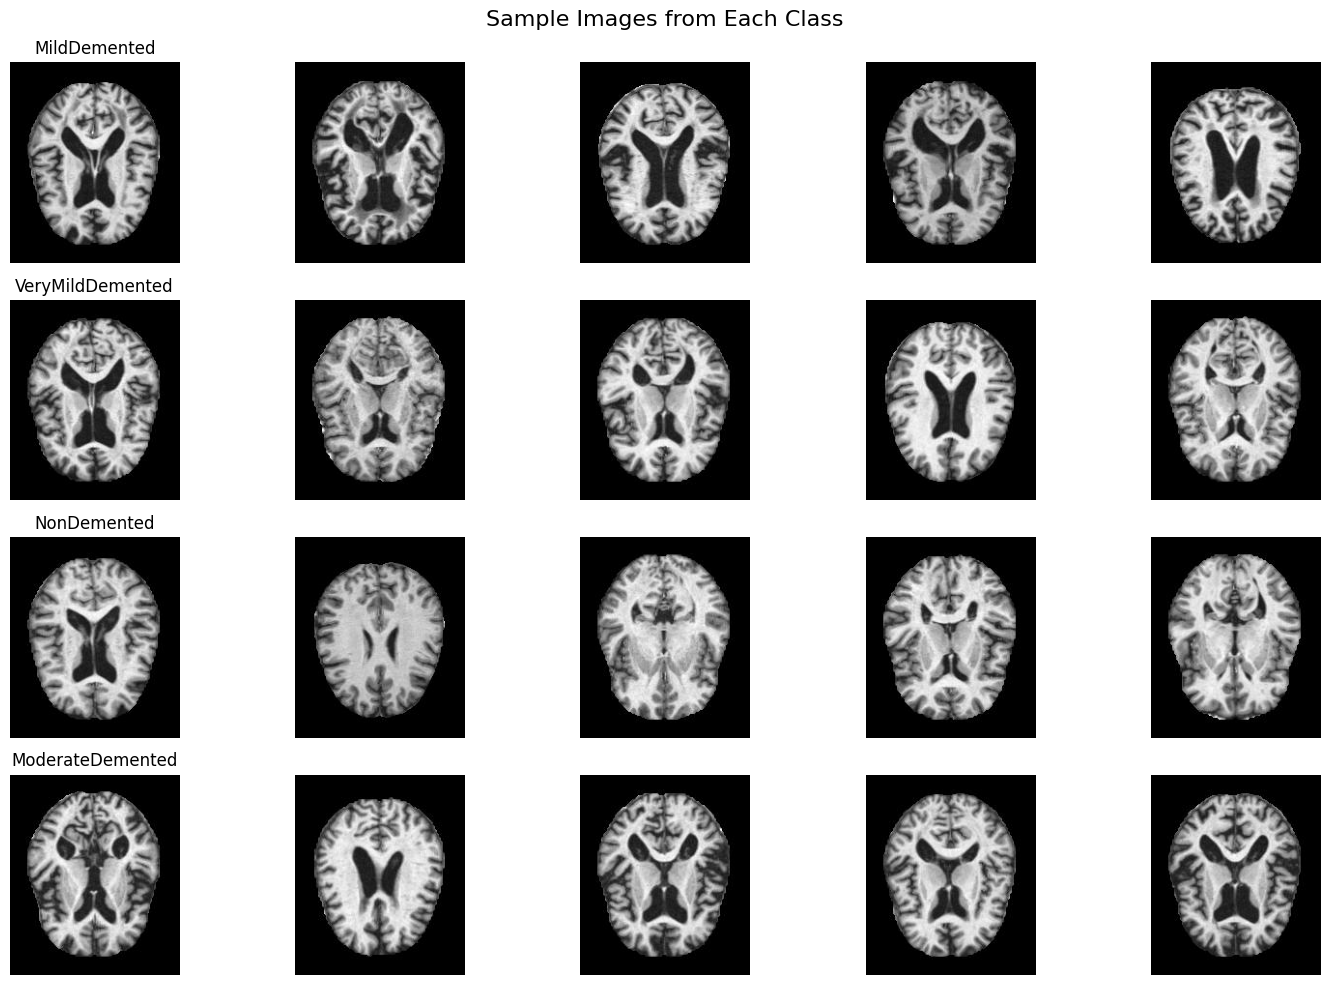

In [108]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# المسار الصحيح للفئات
dataset_path = "/mnt/data/extracted_dataset_v3/OriginalDataset"

# نعرض 5 صور صالحة فقط من كل فئة
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for row, category in enumerate(os.listdir(dataset_path)):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        images_shown = 0
        col = 0
        for file in os.listdir(category_path):
            file_path = os.path.join(category_path, file)
            if os.path.isfile(file_path):
                try:
                    img = mpimg.imread(file_path)
                    axes[row, col].imshow(img, cmap='gray')
                    axes[row, col].axis('off')
                    if col == 0:
                        axes[row, col].set_title(category)
                    col += 1
                    images_shown += 1
                    if images_shown == 5:
                        break  # خلاص عرضنا 5 صور
                except:
                    continue  # لو الصورة تالفة، نعديها
        # لو فيه خانات فاضية نطفيها
        for empty in range(images_shown, 5):
            axes[row, empty].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [93]:
#import os

base_path = "/content"  # المسار اللي فيه ملف الـ zip بعد فك الضغط

for root, dirs, files in os.walk(base_path):
    print(f"\n📁 Current folder: {root}")
    print("Subfolders:", dirs)
    print("Files:", files[:5])  # نطبع أول 5 ملفات فقط
#


📁 Current folder: /content
Subfolders: ['.config', 'sample_data']
Files: ['VeryMildDemented.zip', 'archive (2).zip', 'OriginalDataset.zip']

📁 Current folder: /content/.config
Subfolders: ['logs', 'configurations']
Files: ['active_config', '.last_opt_in_prompt.yaml', 'config_sentinel', '.last_survey_prompt.yaml', 'gce']

📁 Current folder: /content/.config/logs
Subfolders: ['2025.05.14']
Files: []

📁 Current folder: /content/.config/logs/2025.05.14
Subfolders: []
Files: ['13.38.05.736741.log', '13.37.56.530848.log', '13.38.07.566408.log', '13.38.16.976468.log', '13.38.17.706556.log']

📁 Current folder: /content/.config/configurations
Subfolders: []
Files: ['config_default']

📁 Current folder: /content/sample_data
Subfolders: []
Files: ['anscombe.json', 'README.md', 'california_housing_train.csv', 'california_housing_test.csv', 'mnist_test.csv']


In [96]:
from PIL import Image
import os # Make sure os is imported

# نطبع أبعاد 10 صور عشوائية
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    # Check if the category path is a directory
    if os.path.isdir(category_path):
        # List items in the directory and filter for actual files
        files_in_category = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

        # Check if there are any files in the directory
        if files_in_category:
            # Take the first file found as the sample image
            sample_image = os.path.join(category_path, files_in_category[0])
            try:
                with Image.open(sample_image) as img:
                    print(f"{category}: {img.size} (W x H)")
            except Exception as e:
                # Handle potential errors if the file is not a valid image
                print(f"Could not open or read image file {sample_image}: {e}")
        else:
            print(f"No image files found in {category}")

MildDemented: (176, 208) (W x H)
No image files found in AugmentedAlzheimerDataset
VeryMildDemented: (176, 208) (W x H)
No image files found in OriginalDataset
NonDemented: (176, 208) (W x H)
ModerateDemented: (176, 208) (W x H)


In [112]:
# Ensure matplotlib and os are imported
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os





# Iterate through the first 4 categories only to match the number of rows in 'axes'
for row, category in enumerate(os.listdir(dataset_path)[:4]): # <-- Added [:4] here
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        # Filter for actual files (images) and take the first 5
        images = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))][:5]
        if len(images) == 0:
            print(f"⚠️ No images found in category: {category}")
        for col, image_file in enumerate(images):
            # Ensure we don't exceed the column limit (although [:5] on images should handle this)
            if col < 5:
                image_path = os.path.join(category_path, image_file)
                try:
                    img = mpimg.imread(image_path)
                    axes[row, col].imshow(img, cmap='gray')
                    axes[row, col].axis('off')
                    if col == 0:
                        axes[row, col].set_title(category)
                except Exception as e:
                    print(f"❌ Error reading image from {category}: {image_file} — {e}")
                    axes[row, col].axis('off')
                    axes[row, col].set_title(f"{category} (Error)")
            # If somehow we got more than 5 images, break the inner loop
            else:
                break
        # Turn off any unused axes in the row
        for col in range(len(images), 5):
            if row < 4 and col < 5: # Add checks just in case
                axes[row, col].axis('off')
            else:
                break # Stop if we are somehow out of bounds

# If you uncommented the fig, axes creation, you'd also need plt.tight_layout() and plt.show()
#plt.tight_layout()
#plt.show()

In [105]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# المسار
dataset_path = "/mnt/data/extracted_dataset_v3/OriginalDataset"

# إعداد الفئات
categories = sorted(os.listdir(dataset_path))
img_size = (128, 128)

# تخزين الصور والليبلات
images = []
labels = []

print("📥 Loading and processing images...")

for label, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file)
            try:
                img = Image.open(img_path).convert('L')  # Grayscale
                img = img.resize(img_size)
                img_array = np.array(img) / 255.0  # Normalize
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"⚠️ Skipped image {img_path}: {e}")

# تحويل إلى numpy arrays
X = np.array(images).reshape(-1, 128, 128, 1)
y = to_categorical(np.array(labels), num_classes=len(categories))

print(f"✅ Loaded {X.shape[0]} images.")

# تقسيم البيانات
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"🧪 Train: {X_train.shape[0]} | Val: {X_val.shape[0]} | Test: {X_test.shape[0]}")


📥 Loading and processing images...
✅ Loaded 6400 images.
🧪 Train: 4480 | Val: 960 | Test: 960


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 79s 552ms/step - accuracy: 0.2995 - loss: 1.8112 - val_accuracy: 0.4917 - val_loss: 1.1718
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 76s 511ms/step - accuracy: 0.4639 - loss: 1.2339 - val_accuracy: 0.5844 - val_loss: 0.9060
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 82s 510ms/step - accuracy: 0.5268 - loss: 1.0166 - val_accuracy: 0.5281 - val_loss: 0.9941
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 86s 537ms/step - accuracy: 0.6456 - loss: 0.5992 - val_accuracy: 0.7406 - val_loss: 0.6257
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 83s 546ms/step - accuracy: 0.7472 - loss: 0.4264 - val_accuracy: 0.8125 - val_loss: 0.4577
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 75s 537ms/step - accuracy: 0.8200 - loss: 0.2914 - val_accuracy: 0.8917 - val_loss: 0.3510
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 80s 528ms/step - accuracy: 0.8902 - loss: 0.1982 - val_accuracy: 0.8990 - val_loss: 0.2801
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 81s 522ms/step - accuracy: 0.9240 - loss: 0

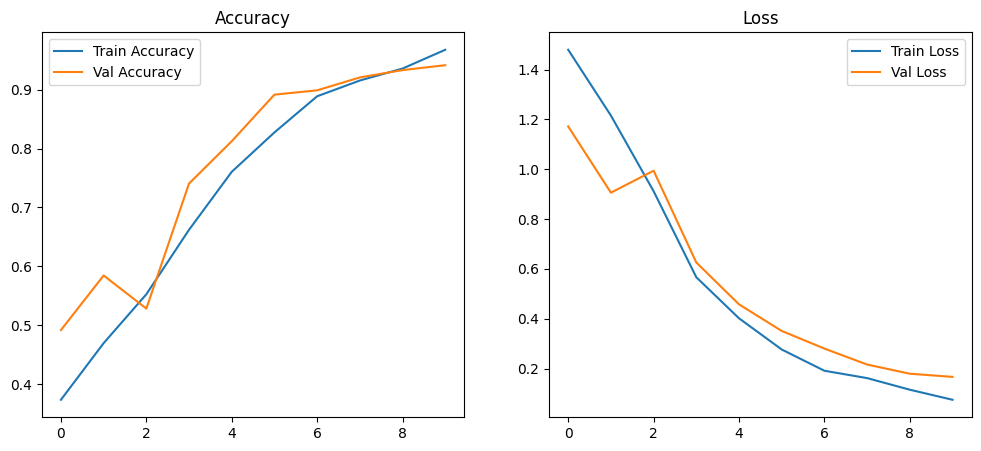

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt

# عدد الفئات
num_classes = y_train.shape[1]

# 🏗️ بناء CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ⚖️ حساب class weights
y_train_labels = np.argmax(y_train, axis=1)
class_weights_values = compute_class_weight(class_weight='balanced',
                                            classes=np.unique(y_train_labels),
                                            y=y_train_labels)

class_weights_dict = {i: weight for i, weight in enumerate(class_weights_values)}

# 🚂 تدريب النموذج
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    class_weight=class_weights_dict)

# 📈 عرض النتائج
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.savefig("accuracy_loss_plot.png")
plt.show()



30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step
🧪 Test Accuracy: 0.9395833333333333

📋 Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.94      0.98      0.96       134
ModerateDemented       1.00      1.00      1.00        10
     NonDemented       0.91      0.99      0.95       480
VeryMildDemented       0.98      0.86      0.92       336

        accuracy                           0.94       960
       macro avg       0.96      0.96      0.96       960
    weighted avg       0.94      0.94      0.94       960



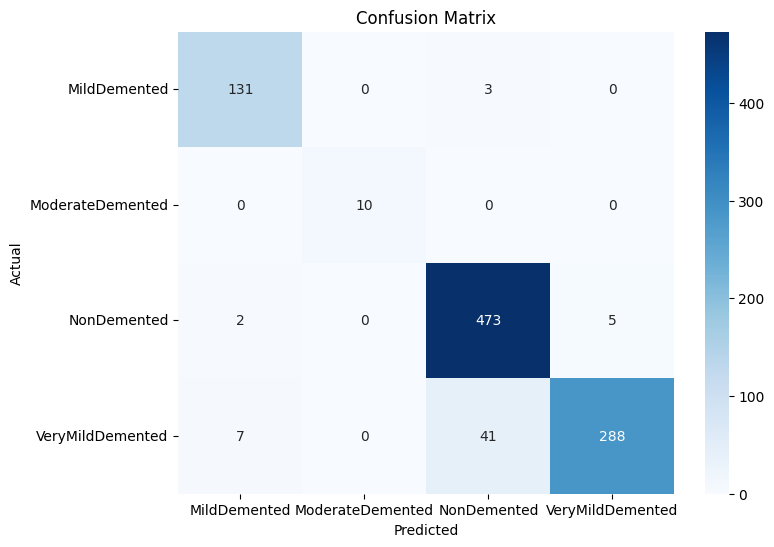

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ✅ التنبؤ على test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 🧮 تقييم
print("🧪 Test Accuracy:", np.mean(y_pred == y_true))

# 🧾 Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=categories))

# 📊 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()


